## read data from files

In [1]:
import janitor
import os
import glob
import mitosheet
import ipywidgets as widgets
%matplotlib inline
%matplotlib widget
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters

from sklearn.model_selection import cross_val_score


%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 22, 10

RANDOM_SEED = 42

In [2]:
# supprimer d'abord les deux lignes dans le fichier d'export Neatatmo
index_col="date"
data=pd.read_csv('df_219.csv', sep=",", encoding = "ISO-8859-1", index_col=index_col)
data.shape



(5448, 94)

In [3]:
#!pip install missingno
import missingno as msno
msno.matrix(data)


ModuleNotFoundError: No module named 'missingno'

In [4]:
df = data.copy()
perc = 3.5 # Like N %
min_count =  int(((100-perc)/100)*df.shape[0] + 1)
df = df.dropna( axis=1, 
                thresh=min_count)


<AxesSubplot:>

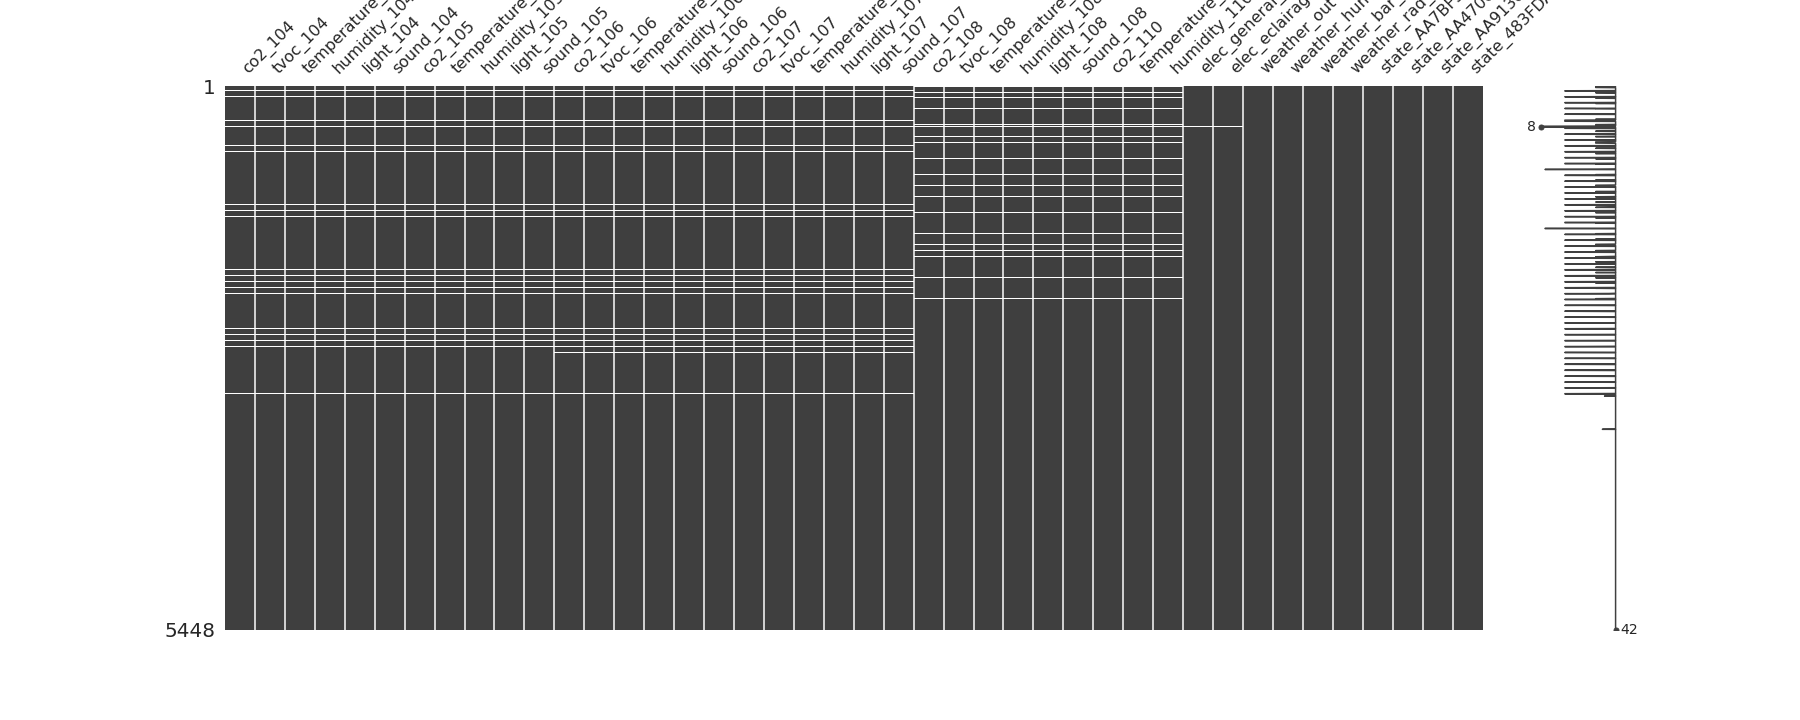

In [5]:
msno.matrix(df)

In [6]:
df.interpolate(method='linear', inplace=True)
df.fillna(method='ffill',inplace=True)
df.fillna(method='bfill',inplace=True)

In [7]:
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 5448 entries, 2022-03-25 16:45:00 to 2022-04-13 14:40:00
Data columns (total 42 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   co2_104               5448 non-null   float64
 1   tvoc_104              5448 non-null   float64
 2   temperature_104       5448 non-null   float64
 3   humidity_104          5448 non-null   float64
 4   light_104             5448 non-null   float64
 5   sound_104             5448 non-null   float64
 6   co2_105               5448 non-null   float64
 7   temperature_105       5448 non-null   float64
 8   humidity_105          5448 non-null   float64
 9   light_105             5448 non-null   float64
 10  sound_105             5448 non-null   float64
 11  co2_106               5448 non-null   float64
 12  tvoc_106              5448 non-null   float64
 13  temperature_106       5448 non-null   float64
 14  humidity_106          5448 non-null   float6

/tmp/ipykernel_12356/1982639406.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(null_counts=True)


In [8]:
x = {"close": 0, "open" : 1}
df = df.replace(x)
df

,co2_104,tvoc_104,temperature_104,humidity_104,light_104,sound_104,co2_105,temperature_105,humidity_105,light_105,...,elec_general_219_w,elec_eclairage_219_w,weather_out,weather_hum,weather_bar_,weather_rad_,state_AA7BF5,state_AA4706,state_AA9130,state_483FDA81E0F4
date,,,,,,,,,,,,,,,,,,,,,
2022-03-25 16:45:00,391.333333,58.000000,24.610000,18.223333,519.333333,512.00,419.750000,25.147500,17.582500,455.000000,...,767.510,308.070,21.200000,22.500000,1023.900000,344.500000,1,1,1,0
2022-03-25 16:50:00,388.000000,78.333333,24.876667,18.220000,506.333333,512.00,415.000000,25.456667,17.483333,445.000000,...,710.274,308.070,21.166667,22.666667,1023.900000,333.000000,0,0,0,1
2022-03-25 16:55:00,414.000000,123.250000,25.672500,17.650000,457.000000,512.25,436.000000,25.760000,17.430000,413.000000,...,620.808,212.622,21.133333,22.833333,1023.900000,321.500000,0,0,0,0
2022-03-25 17:00:00,411.666667,158.666667,26.446667,17.160000,401.000000,512.00,445.750000,26.225000,17.172500,367.750000,...,452.432,0.000,21.100000,23.000000,1023.900000,310.000000,0,0,0,0
2022-03-25 17:05:00,411.333333,197.666667,26.816667,17.033333,396.000000,512.00,448.333333,26.480000,17.223333,360.333333,...,445.334,0.000,21.033333,23.666667,1023.916667,297.166667,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-13 14:20:00,1595.750000,2688.750000,29.335000,39.230000,594.250000,514.00,1591.750000,28.835000,39.952500,487.250000,...,911.166,309.270,18.800000,65.000000,1018.100000,544.000000,0,0,0,0
2022-04-13 14:25:00,1626.400000,2285.400000,29.260000,39.450000,556.400000,512.80,1620.400000,28.820000,40.216000,472.400000,...,933.574,305.992,18.500000,65.000000,1018.300000,355.000000,0,1,0,0
2022-04-13 14:30:00,1326.750000,2079.250000,28.617500,38.607500,614.500000,512.75,1510.500000,28.450000,39.885000,521.750000,...,919.186,309.276,18.600000,65.000000,1018.300000,275.000000,0,1,0,0


In [9]:
df["windows"] = df["state_AA7BF5"] +  df["state_AA4706"] + df["state_AA9130"] +  df["state_483FDA81E0F4"] 
df

,co2_104,tvoc_104,temperature_104,humidity_104,light_104,sound_104,co2_105,temperature_105,humidity_105,light_105,...,elec_eclairage_219_w,weather_out,weather_hum,weather_bar_,weather_rad_,state_AA7BF5,state_AA4706,state_AA9130,state_483FDA81E0F4,windows
date,,,,,,,,,,,,,,,,,,,,,
2022-03-25 16:45:00,391.333333,58.000000,24.610000,18.223333,519.333333,512.00,419.750000,25.147500,17.582500,455.000000,...,308.070,21.200000,22.500000,1023.900000,344.500000,1,1,1,0,3
2022-03-25 16:50:00,388.000000,78.333333,24.876667,18.220000,506.333333,512.00,415.000000,25.456667,17.483333,445.000000,...,308.070,21.166667,22.666667,1023.900000,333.000000,0,0,0,1,1
2022-03-25 16:55:00,414.000000,123.250000,25.672500,17.650000,457.000000,512.25,436.000000,25.760000,17.430000,413.000000,...,212.622,21.133333,22.833333,1023.900000,321.500000,0,0,0,0,0
2022-03-25 17:00:00,411.666667,158.666667,26.446667,17.160000,401.000000,512.00,445.750000,26.225000,17.172500,367.750000,...,0.000,21.100000,23.000000,1023.900000,310.000000,0,0,0,0,0
2022-03-25 17:05:00,411.333333,197.666667,26.816667,17.033333,396.000000,512.00,448.333333,26.480000,17.223333,360.333333,...,0.000,21.033333,23.666667,1023.916667,297.166667,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-13 14:20:00,1595.750000,2688.750000,29.335000,39.230000,594.250000,514.00,1591.750000,28.835000,39.952500,487.250000,...,309.270,18.800000,65.000000,1018.100000,544.000000,0,0,0,0,0
2022-04-13 14:25:00,1626.400000,2285.400000,29.260000,39.450000,556.400000,512.80,1620.400000,28.820000,40.216000,472.400000,...,305.992,18.500000,65.000000,1018.300000,355.000000,0,1,0,0,1
2022-04-13 14:30:00,1326.750000,2079.250000,28.617500,38.607500,614.500000,512.75,1510.500000,28.450000,39.885000,521.750000,...,309.276,18.600000,65.000000,1018.300000,275.000000,0,1,0,0,1


In [10]:
# df1 = df.iloc[:,30:].copy()
# df1=df1.drop(columns=["state_AA7BF5","state_AA4706","state_AA9130","state_483FDA81E0F4","elec_eclairage_219_w"])
# sns.pairplot(df1,  hue='windows')
# plt.show

In [11]:
corr = df.corr()
corr.tail(10)

,co2_104,tvoc_104,temperature_104,humidity_104,light_104,sound_104,co2_105,temperature_105,humidity_105,light_105,...,elec_eclairage_219_w,weather_out,weather_hum,weather_bar_,weather_rad_,state_AA7BF5,state_AA4706,state_AA9130,state_483FDA81E0F4,windows
elec_eclairage_219_w,0.754658,0.605260,0.627721,0.345184,0.474604,0.073385,0.753617,0.633826,0.351155,0.539155,...,1.000000,0.059278,0.165016,-0.303444,0.171521,0.075532,0.142034,0.174473,0.026088,0.157276
weather_out,0.112913,0.099766,0.394991,0.289018,0.305203,0.022781,0.087146,0.382405,0.293168,0.301710,...,0.059278,1.000000,-0.509513,-0.168507,0.358131,0.260156,0.294956,0.113856,0.201286,0.312830
weather_hum,0.119303,0.257845,-0.090917,0.559922,-0.338734,0.019994,0.128642,-0.083053,0.558232,-0.299702,...,0.165016,-0.509513,1.000000,-0.506678,-0.480103,-0.235940,-0.143926,0.014803,-0.233347,-0.199833
weather_bar_,-0.310721,-0.437114,-0.348676,-0.760631,0.015710,-0.056782,-0.301855,-0.341512,-0.765073,-0.024464,...,-0.303444,-0.168507,-0.506678,1.000000,0.152894,0.026016,-0.021298,-0.192997,0.083137,-0.046634
weather_rad_,0.209339,0.023659,0.281897,-0.074070,0.829776,-0.002970,0.203202,0.268337,-0.069596,0.798703,...,0.171521,0.358131,-0.480103,0.152894,1.000000,0.250235,0.185213,0.094643,0.185922,0.249164
state_AA7BF5,0.119034,0.099578,0.302571,-0.041560,0.258577,0.017421,0.116851,0.288982,-0.032671,0.263807,...,0.075532,0.260156,-0.235940,0.026016,0.250235,1.000000,0.503982,0.345960,0.741658,0.877303
state_AA4706,0.258421,0.202849,0.307715,0.176902,0.267634,0.023417,0.252420,0.324460,0.170957,0.271623,...,0.142034,0.294956,-0.143926,-0.021298,0.185213,0.503982,1.000000,0.084178,0.457217,0.769761
state_AA9130,0.083079,0.108340,0.224992,0.152717,0.158656,0.052485,0.085399,0.223540,0.157580,0.177021,...,0.174473,0.113856,0.014803,-0.192997,0.094643,0.345960,0.084178,1.000000,-0.024946,0.496747
state_483FDA81E0F4,0.138083,0.136042,0.257160,-0.093227,0.186100,-0.039053,0.139199,0.261151,-0.091816,0.178347,...,0.026088,0.201286,-0.233347,0.083137,0.185922,0.741658,0.457217,-0.024946,1.000000,0.707222
windows,0.221756,0.198380,0.386170,0.095102,0.311630,0.024594,0.219409,0.389715,0.097462,0.319582,...,0.157276,0.312830,-0.199833,-0.046634,0.249164,0.877303,0.769761,0.496747,0.707222,1.000000


In [12]:
s=corr["elec_eclairage_219_w"]
s.sort_values(ascending=False)
var = ["co2_104","co2_107","temperature_106","windows"]
var = ["co2_107","temperature_106"]



In [13]:
var = df.columns

In [14]:
var = var.drop([ 'state_AA7BF5', 'state_AA4706', 'state_AA9130',
       'state_483FDA81E0F4', 'elec_general_219_w',
       'elec_eclairage_219_w'])

In [28]:
var[col]

Index(['windows', 'co2_104', 'tvoc_104', 'temperature_104', 'humidity_104',
       'light_104', 'sound_104', 'co2_105', 'temperature_105', 'humidity_105',
       'light_105', 'sound_105', 'co2_106', 'tvoc_106'],
      dtype='object')

In [45]:
df[var[col]]

,windows,co2_104,tvoc_104,temperature_104,humidity_104,light_104,sound_104,co2_105,temperature_105,humidity_105,light_105,sound_105,co2_106,tvoc_106
date,,,,,,,,,,,,,,
2022-03-25 16:45:00,3,391.333333,58.000000,24.610000,18.223333,519.333333,512.00,419.750000,25.147500,17.582500,455.000000,512.250000,388.750000,105.750000
2022-03-25 16:50:00,1,388.000000,78.333333,24.876667,18.220000,506.333333,512.00,415.000000,25.456667,17.483333,445.000000,512.000000,394.666667,117.333333
2022-03-25 16:55:00,0,414.000000,123.250000,25.672500,17.650000,457.000000,512.25,436.000000,25.760000,17.430000,413.000000,512.000000,400.333333,130.000000
2022-03-25 17:00:00,0,411.666667,158.666667,26.446667,17.160000,401.000000,512.00,445.750000,26.225000,17.172500,367.750000,511.750000,403.250000,147.250000
2022-03-25 17:05:00,0,411.333333,197.666667,26.816667,17.033333,396.000000,512.00,448.333333,26.480000,17.223333,360.333333,512.333333,406.666667,217.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-13 14:20:00,0,1595.750000,2688.750000,29.335000,39.230000,594.250000,514.00,1591.750000,28.835000,39.952500,487.250000,515.750000,1515.200000,2506.400000
2022-04-13 14:25:00,1,1626.400000,2285.400000,29.260000,39.450000,556.400000,512.80,1620.400000,28.820000,40.216000,472.400000,509.000000,1540.750000,2462.750000
2022-04-13 14:30:00,1,1326.750000,2079.250000,28.617500,38.607500,614.500000,512.75,1510.500000,28.450000,39.885000,521.750000,507.750000,1500.200000,2628.000000


In [16]:
#corr["elec_general_219_w"]

In [57]:
import pandas
from sklearn import linear_model

X = df[var]
col = [0, 4, 5, 7, 8, 9, 13, 14, 15, 17, 18, 21, 25, 26, 29, 30, 32, 33, 34, 35, 36]
col = [0, 4, 5, 7, 8, 9, 13,  15,  18, 21,  26, 29, 30]
col2    =[0, 1, 2, 3, 4, 5,6,  8, 10, 11, 13, 14,15]
X= X.iloc[:,col]
#X= X.iloc[:,col2]
y = df['elec_general_219_w']
# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split
# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train = X_train.values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
datascaler=scaler.fit(X_train)
X_train= datascaler.transform(X_train)
X_test= datascaler.transform(X_test)

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)


print(regr.coef_) 

[ 167.78371685  123.11351027    6.78908703   69.12579755 -254.9205302
 -135.50667472  -32.37690622  781.12937228  -21.26878823 -658.32558087
  264.3182726   -62.25508488   34.31434424]


/home/ahmed/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [58]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:     elec_general_219_w   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     3010.
Date:                Tue, 03 May 2022   Prob (F-statistic):               0.00
Time:                        12:27:30   Log-Likelihood:                -26201.
No. Observations:                4358   AIC:                         5.243e+04
Df Residuals:                    4344   BIC:                         5.252e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        457.9271      1.499    305.417      0.0

In [52]:
lm = linear_model.LinearRegression()
X, y=X_train, y_train
lm.fit(X,y)
params = np.append(lm.intercept_,lm.coef_)
predictions = lm.predict(X)

newX = pd.DataFrame({"Constant":np.ones(len(X))}).join(pd.DataFrame(X))
MSE = (sum((y-predictions)**2))/(len(newX)-len(newX.columns))

# Note if you don't want to use a DataFrame replace the two lines above with
# newX = np.append(np.ones((len(X),1)), X, axis=1)
# MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))

var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/sd_b

p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-len(newX.columns)-1))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

myDF3 = pd.DataFrame()
myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["Probabilities"] = [params,sd_b,ts_b,p_values]
print(myDF3)

    Coefficients  Standard Errors  t values  Probabilities
0       457.9271            1.441   317.876          0.000
1       100.4238           17.603     5.705          0.000
2       153.6646           19.054     8.065          0.000
3         6.3948            1.460     4.379          0.000
4        77.3068            4.953    15.609          0.000
5      -271.9678           15.029   -18.096          0.000
6      -218.2944           30.664    -7.119          0.000
7       -48.6303            8.722    -5.575          0.000
8       217.3642           25.969     8.370          0.000
9       798.4405           12.438    64.193          0.000
10       50.7662           17.623     2.881          0.004
11      -25.4173            2.569    -9.894          0.000
12     -617.3359           18.975   -32.534          0.000
13       18.7586            7.963     2.356          0.019
14      111.4769           22.776     4.895          0.000
15      -64.1616            5.104   -12.570          0.0

In [40]:
col= []
for i,pval in enumerate(myDF3["Probabilities"]):
    if pval<=0.001:
        col.append(i-1)
col    

[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [41]:
X_train

array([[-0.49029424, -0.91671201, -0.05850269, ..., -0.34524215,
        -1.00821711, -1.6898662 ],
       [-0.51434901,  0.82743462, -0.05850269, ..., -1.15907957,
        -0.04568296,  0.42059457],
       [-0.51687445,  0.54035608, -0.05850269, ..., -0.85984098,
        -0.13774352,  0.63930748],
       ...,
       [ 0.10633974, -0.38436436, -0.05850269, ...,  1.09487932,
        -1.00821711, -1.6898662 ],
       [ 0.82286874,  0.41524089,  1.04210039, ...,  1.30077035,
        -1.00821711, -1.6898662 ],
       [ 0.44026536,  1.54561264, -0.79223807, ..., -0.7950441 ,
         0.45199095,  0.75683596]])

In [42]:
X

array([[-0.49029424, -0.91671201, -0.05850269, ..., -0.34524215,
        -1.00821711, -1.6898662 ],
       [-0.51434901,  0.82743462, -0.05850269, ..., -1.15907957,
        -0.04568296,  0.42059457],
       [-0.51687445,  0.54035608, -0.05850269, ..., -0.85984098,
        -0.13774352,  0.63930748],
       ...,
       [ 0.10633974, -0.38436436, -0.05850269, ...,  1.09487932,
        -1.00821711, -1.6898662 ],
       [ 0.82286874,  0.41524089,  1.04210039, ...,  1.30077035,
        -1.00821711, -1.6898662 ],
       [ 0.44026536,  1.54561264, -0.79223807, ..., -0.7950441 ,
         0.45199095,  0.75683596]])

In [43]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_pred)
print("r2 socre is ",score)
print("mean_sqrd_error is ",mean_squared_error(y_test,y_pred))
print("root_mean_squared error of is ",np.sqrt(mean_squared_error(y_test,y_pred)))

r2 socre is  0.8742518896535304
mean_sqrd_error is  11562.8219131428
root_mean_squared error of is  107.53056269332362


<AxesSubplot:xlabel='date'>

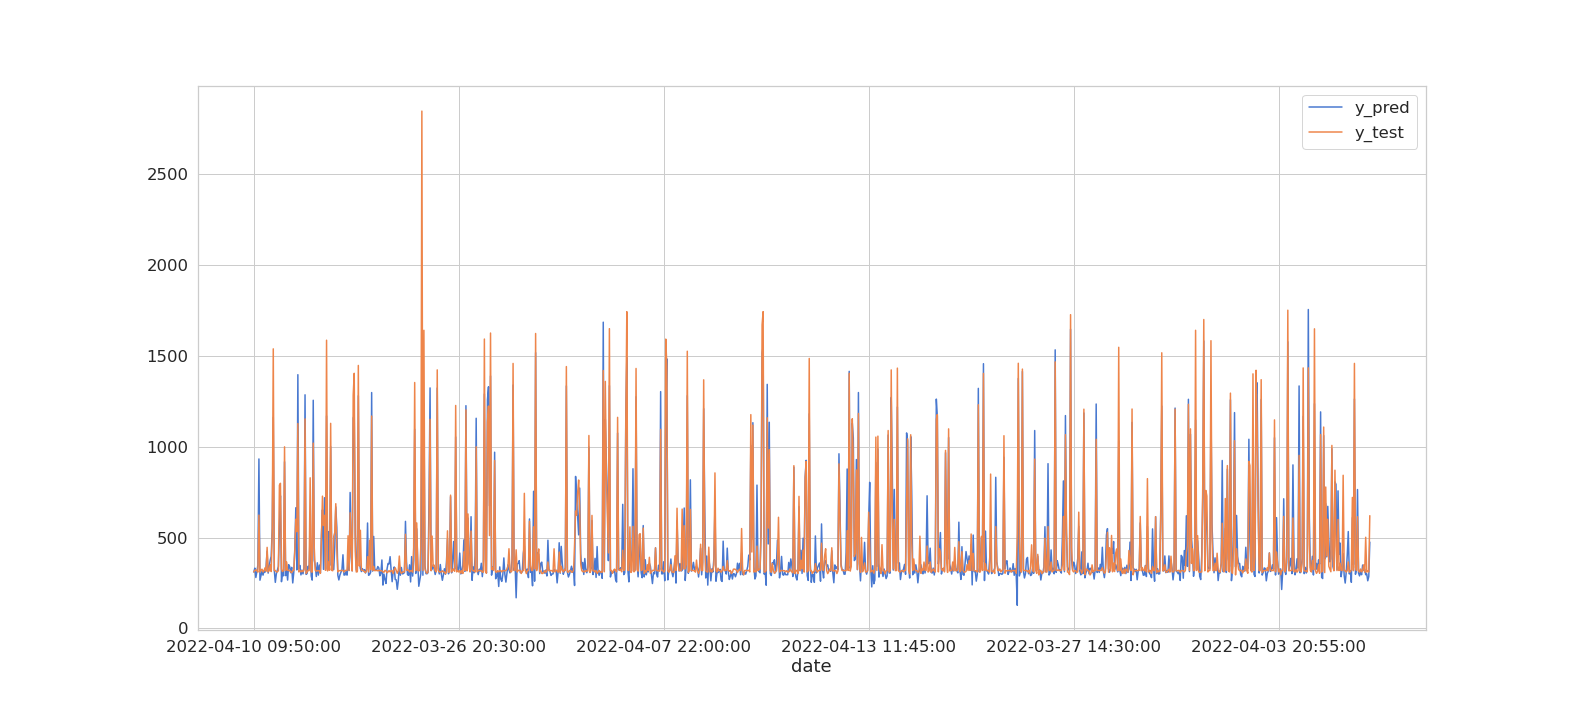

In [44]:
d = {'y_pred': y_pred, 'y_test': y_test}
dfplot= pd.DataFrame(data=d)
dfplot.plot()


## Missing data generation

In [8]:
#!pip install torch
#!pip install wget 
import wget
#wget.download('https://raw.githubusercontent.com/BorisMuzellec/MissingDataOT/master/utils.py')

import numpy as np
import pandas as pd
from utils import *
import torch
import seaborn as sns

In [49]:
df1 = df.copy()



,co2_104,tvoc_104,temperature_104,humidity_104,light_104,sound_104,co2_105,temperature_105,humidity_105,light_105,...,elec_general_219_w,elec_eclairage_219_w,weather_out,weather_hum,weather_bar_,weather_rad_,state_AA7BF5,state_AA4706,state_AA9130,state_483FDA81E0F4
date,,,,,,,,,,,,,,,,,,,,,
2022-03-25 16:45:00,391.333333,58.000000,24.610000,18.223333,519.333333,512.00,419.750000,25.147500,17.582500,455.000000,...,767.510,308.070,21.200000,22.500000,1023.900000,344.500000,1,1,1,0
2022-03-25 16:50:00,388.000000,78.333333,24.876667,18.220000,506.333333,512.00,415.000000,25.456667,17.483333,445.000000,...,710.274,308.070,21.166667,22.666667,1023.900000,333.000000,0,0,0,1
2022-03-25 16:55:00,414.000000,123.250000,25.672500,17.650000,457.000000,512.25,436.000000,25.760000,17.430000,413.000000,...,620.808,212.622,21.133333,22.833333,1023.900000,321.500000,0,0,0,0
2022-03-25 17:00:00,411.666667,158.666667,26.446667,17.160000,401.000000,512.00,445.750000,26.225000,17.172500,367.750000,...,452.432,0.000,21.100000,23.000000,1023.900000,310.000000,0,0,0,0
2022-03-25 17:05:00,411.333333,197.666667,26.816667,17.033333,396.000000,512.00,448.333333,26.480000,17.223333,360.333333,...,445.334,0.000,21.033333,23.666667,1023.916667,297.166667,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-13 14:20:00,1595.750000,2688.750000,29.335000,39.230000,594.250000,514.00,1591.750000,28.835000,39.952500,487.250000,...,911.166,309.270,18.800000,65.000000,1018.100000,544.000000,0,0,0,0
2022-04-13 14:25:00,1626.400000,2285.400000,29.260000,39.450000,556.400000,512.80,1620.400000,28.820000,40.216000,472.400000,...,933.574,305.992,18.500000,65.000000,1018.300000,355.000000,0,1,0,0
2022-04-13 14:30:00,1326.750000,2079.250000,28.617500,38.607500,614.500000,512.75,1510.500000,28.450000,39.885000,521.750000,...,919.186,309.276,18.600000,65.000000,1018.300000,275.000000,0,1,0,0


<AxesSubplot:xlabel='date'>

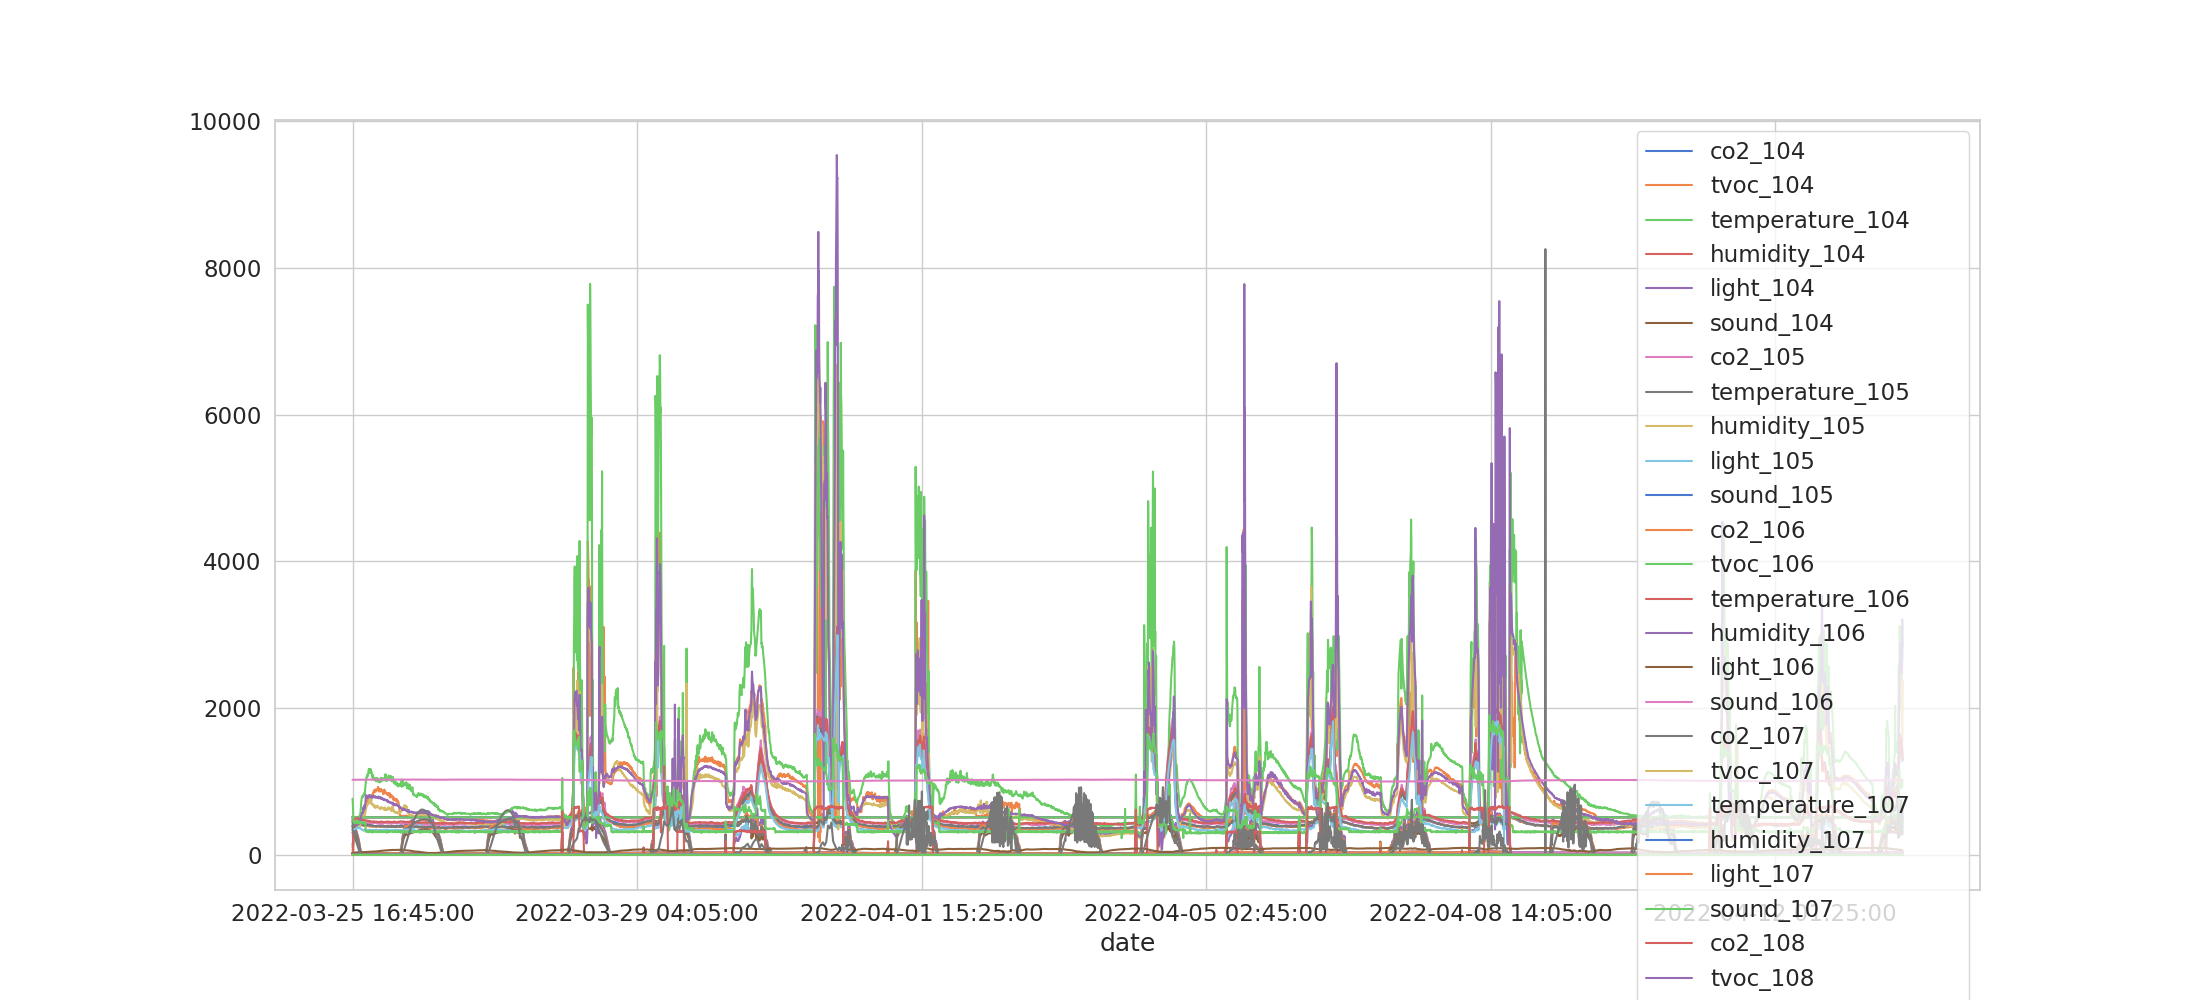

In [168]:
df.plot()

In [27]:
#!pip install category_encoders
import category_encoders as ce
# Get a new clean dataframe
obj_df = df1.select_dtypes(include=['object']).copy()

In [29]:
df1 = obj_df.replace(x)

<AxesSubplot:xlabel='date'>

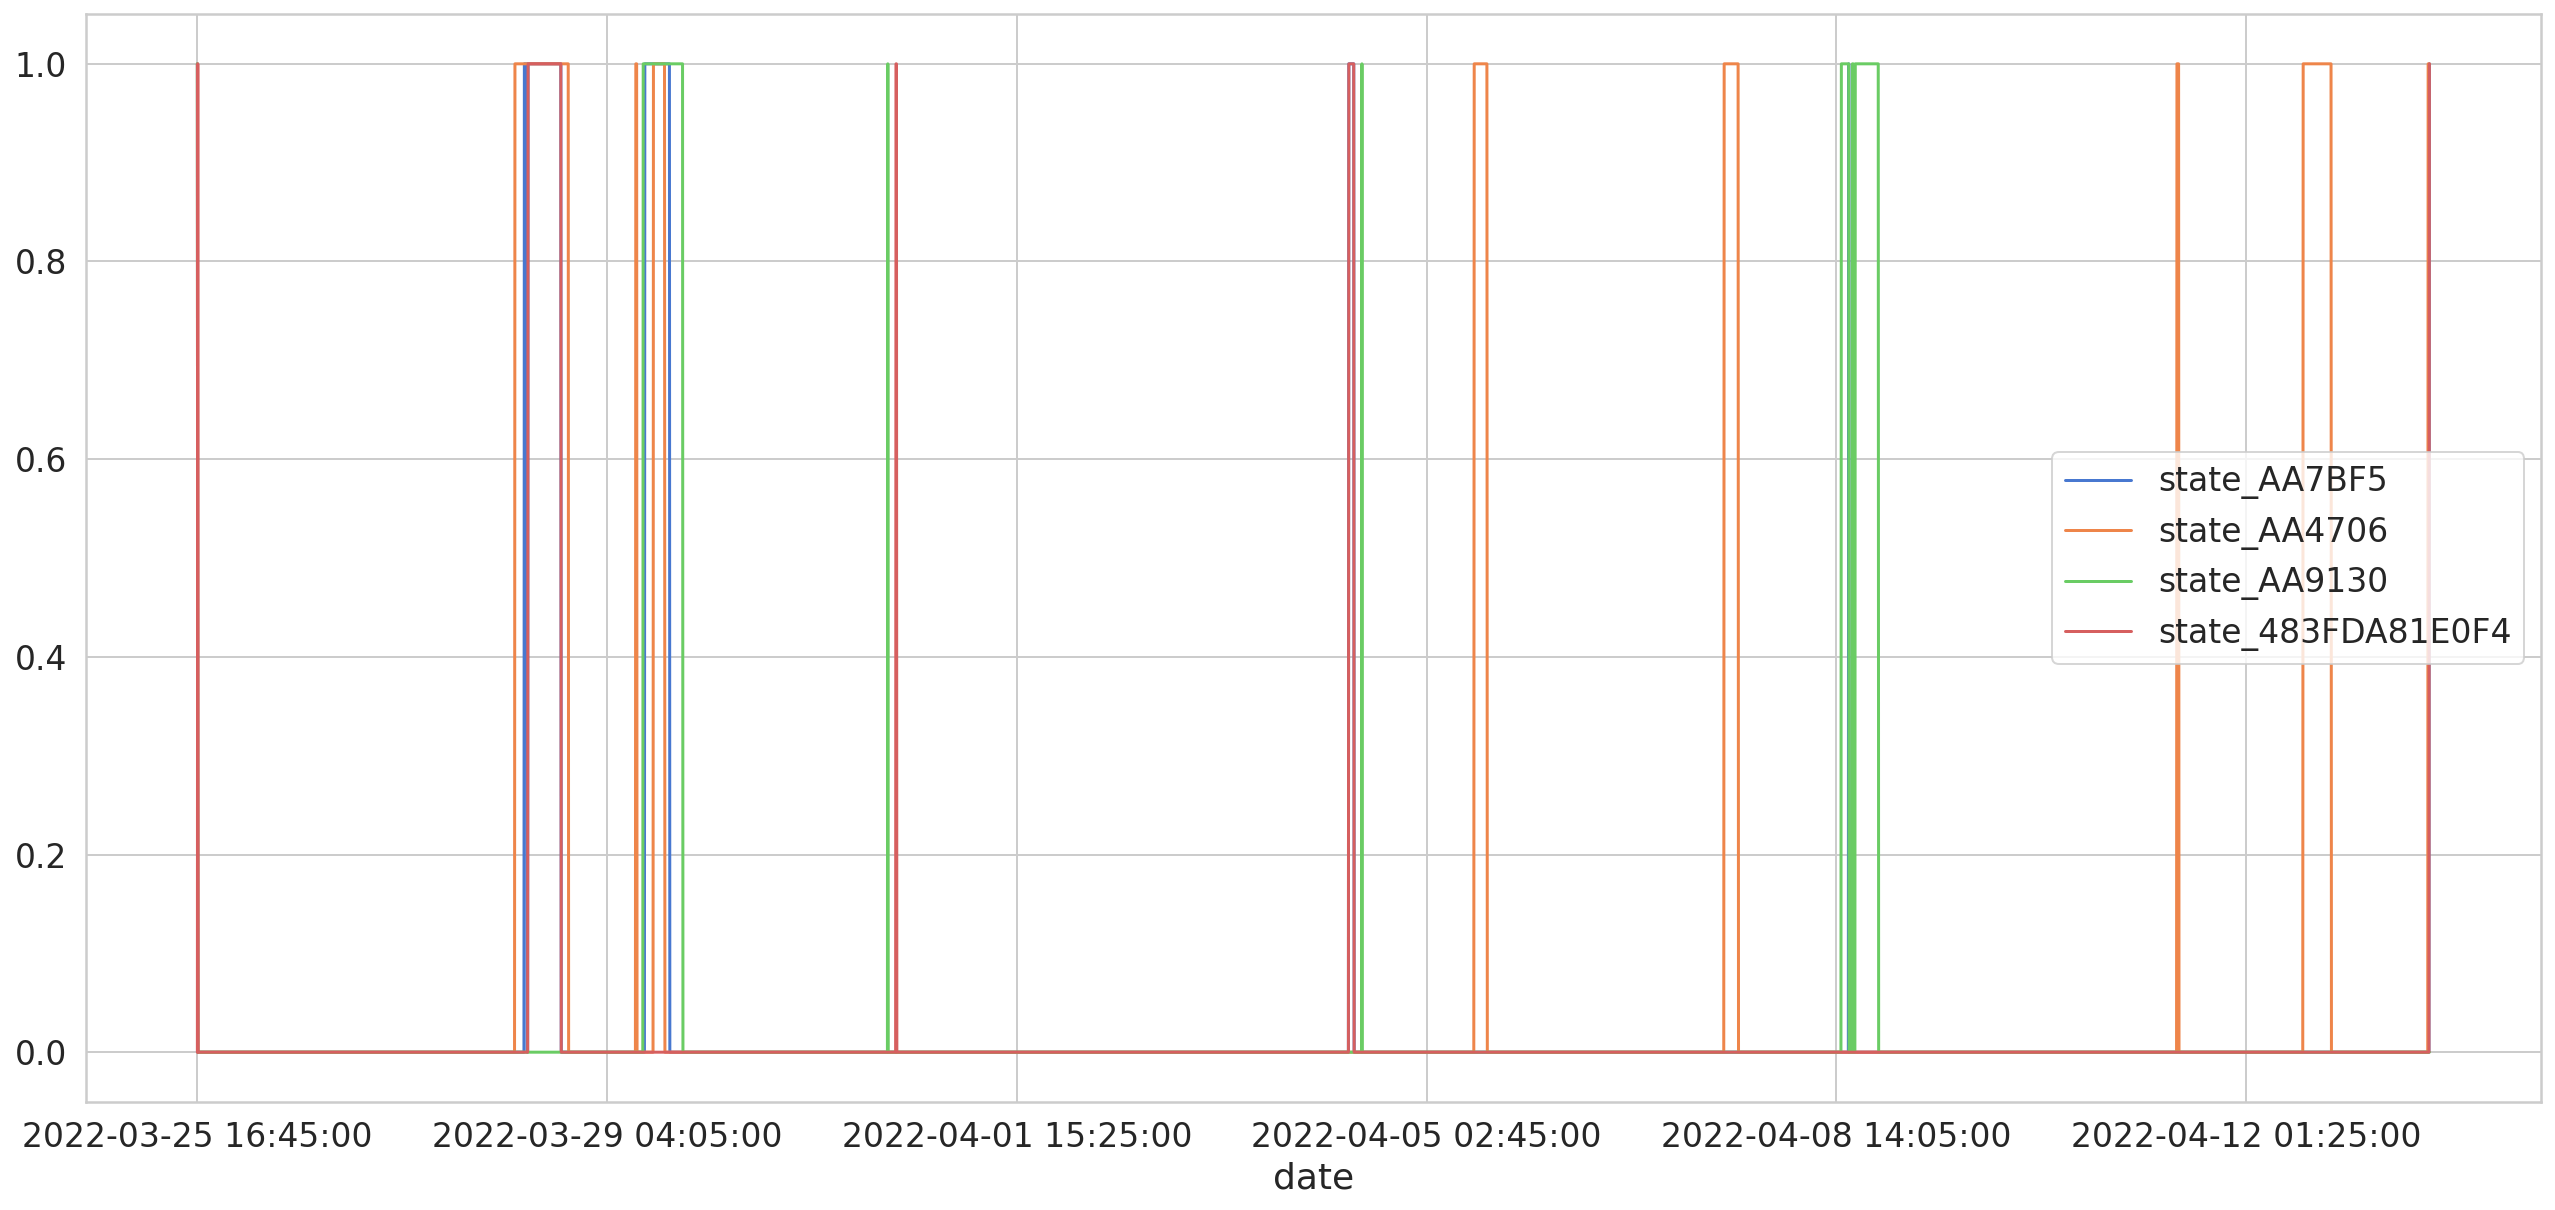

In [31]:
df1.plot()

,state_AA7BF5,state_AA4706,state_AA9130,state_483FDA81E0F4
date,,,,
2022-03-25 16:45:00,1,1,1,0
2022-03-25 16:50:00,0,0,0,1
2022-03-25 16:55:00,0,0,0,0
2022-03-25 17:00:00,0,0,0,0
2022-03-25 17:05:00,0,0,0,0
...,...,...,...,...
2022-04-13 14:20:00,0,0,0,0
2022-04-13 14:25:00,0,1,0,0
2022-04-13 14:30:00,0,1,0,0


In [12]:
# Fix the seed ------------------------------------------------------
np.random.seed(2)

In [13]:
# Function produce_NA for generating missing values ------------------------------------------------------

def produce_NA(X, p_miss, mecha="MCAR", opt=None, p_obs=None, q=None):
    """
    Generate missing values for specifics missing-data mechanism and proportion of missing values. 
    
    Parameters
    ----------
    X : torch.DoubleTensor or np.ndarray, shape (n, d)
        Data for which missing values will be simulated.
        If a numpy array is provided, it will be converted to a pytorch tensor.
    p_miss : float
        Proportion of missing values to generate for variables which will have missing values.
    mecha : str, 
            Indicates the missing-data mechanism to be used. "MCAR" by default, "MAR", "MNAR" or "MNARsmask"
    opt: str, 
         For mecha = "MNAR", it indicates how the missing-data mechanism is generated: using a logistic regression ("logistic"), quantile censorship ("quantile") or logistic regression for generating a self-masked MNAR mechanism ("selfmasked").
    p_obs : float
            If mecha = "MAR", or mecha = "MNAR" with opt = "logistic" or "quanti", proportion of variables with *no* missing values that will be used for the logistic masking model.
    q : float
        If mecha = "MNAR" and opt = "quanti", quantile level at which the cuts should occur.
    
    Returns
    ----------
    A dictionnary containing:
    'X_init': the initial data matrix.
    'X_incomp': the data with the generated missing values.
    'mask': a matrix indexing the generated missing values.s
    """
    
    to_torch = torch.is_tensor(X) ## output a pytorch tensor, or a numpy array
    if not to_torch:
        X = X.astype(np.float32)
        X = torch.from_numpy(X)
    
    if mecha == "MAR":
        mask = MAR_mask(X, p_miss, p_obs).double()
    elif mecha == "MNAR" and opt == "logistic":
        mask = MNAR_mask_logistic(X, p_miss, p_obs).double()
    elif mecha == "MNAR" and opt == "quantile":
        mask = MNAR_mask_quantiles(X, p_miss, q, 1-p_obs).double()
    elif mecha == "MNAR" and opt == "selfmasked":
        mask = MNAR_self_mask_logistic(X, p_miss).double()
    else:
        mask = (torch.rand(X.shape) < p_miss).double()
    
    X_nas = X.clone()
    X_nas[mask.bool()] = np.nan
    
    return {'X_init': X.double(), 'X_incomp': X_nas.double(), 'mask': mask}

In [14]:
X = df.copy()
shelly_219 =  ['state_AA7BF5','state_AA4706', 'state_AA9130', 'state_483FDA81E0F4']
for shelly in shelly_219:
    X = X.drop([shelly ], axis=1)

In [15]:
X.columns

Index(['co2_104', 'tvoc_104', 'temperature_104', 'humidity_104', 'light_104',
       'sound_104', 'co2_105', 'temperature_105', 'humidity_105', 'light_105',
       'sound_105', 'co2_106', 'tvoc_106', 'temperature_106', 'humidity_106',
       'light_106', 'sound_106', 'co2_107', 'tvoc_107', 'temperature_107',
       'humidity_107', 'light_107', 'sound_107', 'co2_108', 'tvoc_108',
       'temperature_108', 'humidity_108', 'light_108', 'sound_108', 'co2_110',
       'temperature_110', 'humidity_110', 'elec_general_219_w',
       'elec_eclairage_219_w', 'weather_out', 'weather_hum', 'weather_bar_',
       'weather_rad_'],
      dtype='object')

In [16]:
X = X.values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
datascaler=scaler.fit(X)
X= datascaler.transform(X)

In [17]:
import pandas as pd
df= pd.DataFrame(X)
df.index=data.index

In [18]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
date,,,,,,,,,,,,,,,,,,,,,
2022-03-25 16:45:00,-0.459200,-1.276636,-0.585821,-1.874746,1.334931,-0.057757,-0.486987,0.012951,-1.996094,1.449536,...,2.248776,-0.079832,0.846368,-0.399108,1.003828,1.088733,2.148575,-2.611465,1.132664,1.036167
2022-03-25 16:50:00,-0.468655,-1.246192,-0.387581,-1.875332,1.278630,-0.057757,-0.500283,0.255715,-2.013189,1.397436,...,2.248776,-0.075088,0.848804,-0.388510,0.819683,1.088733,2.142112,-2.602311,1.132664,0.979155
2022-03-25 16:55:00,-0.394904,-1.178941,0.204041,-1.975611,1.064974,0.503002,-0.441498,0.493899,-2.022382,1.230718,...,2.248776,-0.070344,0.851240,-0.377912,0.531843,0.621786,2.135648,-2.593156,1.132664,0.922143
2022-03-25 17:00:00,-0.401523,-1.125913,0.779557,-2.061816,0.822445,-0.057757,-0.414205,0.859027,-2.066771,0.994968,...,2.248776,-0.065600,0.853676,-0.367313,-0.009875,-0.418395,2.129184,-2.584001,1.132664,0.865132
2022-03-25 17:05:00,-0.402468,-1.067520,1.054614,-2.084100,0.800791,-0.057757,-0.406973,1.059259,-2.058008,0.956327,...,2.248776,-0.060857,0.856112,-0.356715,-0.032711,-0.418395,2.116256,-2.547383,1.134680,0.801510


In [19]:
#df.to_csv('dataComplet_219.csv')

## MCAR Generation

In [20]:
# Minimal example for generating missing data ------------------------
p='5.csv'
X_miss_mcar = produce_NA(X, p_miss=0.05, mecha="MCAR")
X_mcar = X_miss_mcar['X_incomp']
R_mcar = X_miss_mcar['mask']

print("Percentage of newly generated missing values: ", (R_mcar.sum()).numpy()/np.prod(R_mcar.size())*100, " %")

df = X_mcar
df = df.numpy()
mask=R_mcar
mask = mask.numpy()

df = pd.DataFrame(data=df, columns=['Temperature', 'Humidity', 'CO2', 'Noise','Pressure'])
mask = pd.DataFrame(data=mask, columns=['Temperature', 'Humidity', 'CO2', 'Noise','Pressure'])

df['time']= data.index
df.set_index('time',inplace = True)
mask['time']= data.index
mask.set_index('time',inplace = True)
df.to_csv('MCAR'+p)
mask.to_csv('mask'+p)

Percentage of newly generated missing values:  5.009081072725867  %


ValueError: Shape of passed values is (5448, 38), indices imply (5448, 5)

In [ ]:
#df.to_csv('MCAR25.csv')
# supprimer d'abord les deux lignes dans le fichier d'export Neatatmo
index_col="time"
df=pd.read_csv('MCAR40.csv', sep=",", encoding = "ISO-8859-1", index_col=index_col)
mask=pd.read_csv('mask40.csv', sep=",", encoding = "ISO-8859-1", index_col=index_col)
mask=mask.values


In [ ]:
# Sample mar data -----------------------------------------
X_miss_mar = produce_NA(X, p_miss=0.4, mecha="MAR", p_obs=0.4)

X_mar = X_miss_mar['X_incomp']
R_mar = X_miss_mar['mask']

print("Percentage of generated missing values: ", (R_mar.sum()).numpy()/np.prod(R_mar.size())*100, " %")

ax = sns.heatmap(X_mar, mask=R_mar.numpy()==1, linewidths=0.02, linecolor='black')

df = X_mar
df = df.numpy()
mask_mar = R_mar
mask_mar = mask_mar.numpy()

df = pd.DataFrame(data=df, columns=['Temperature', 'Humidity', 'CO2', 'Noise','Pressure'])
mask_mar = pd.DataFrame(data=mask_mar, columns=['Temperature', 'Humidity', 'CO2', 'Noise','Pressure'])



In [ ]:
# df['time']= data.index
# df.set_index('time',inplace = True)
# mask_mar['time'] = data.index
# mask_mar.set_index('time',inplace = True)
# df.to_csv('MAR'+p)
# mask_mar.to_csv('mask_mar'+p)

In [ ]:
# Minimal example for generating missing data ------------------------
p='5.csv'

In [ ]:
pourcentage=5
p=